In [1]:
import pandas as pd
import matplotlib.pyplot as plt

allFilm = pd.read_csv(r"C:\Users\EliteBook\Desktop\pandas_project\imdb_top_1000.csv")

In [2]:
#here i will delete the coulmn i show that its not important
columnsToDrop = ['Poster_Link', 'Runtime', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4']


In [3]:
columnsWithMissing = allFilm.columns[allFilm.isnull().any()]
print(columnsWithMissing)

Index(['Certificate', 'Meta_score', 'Gross'], dtype='object')


In [4]:
allFilm['Meta_score'] = allFilm['Meta_score'].fillna(0)
print('Cleaning done')

Cleaning done


In [5]:
#here i find the most popular Genre depend to IMDB_Rating

mostPopular = allFilm.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
print('The most popular Genre: ',mostPopular.head(1))
print('******************')
print('all Genre ',mostPopular)

The most popular Genre:  Genre
Animation, Drama, War    8.5
Name: IMDB_Rating, dtype: float64
******************
all Genre  Genre
Animation, Drama, War         8.50
Drama, Musical                8.40
Action, Sci-Fi                8.40
Drama, Mystery, War           8.35
Western                       8.35
                              ... 
Adventure, Comedy, War        7.60
Animation, Comedy, Crime      7.60
Action, Adventure, Family     7.60
Animation, Drama, Romance     7.60
Action, Adventure, Mystery    7.60
Name: IMDB_Rating, Length: 202, dtype: float64


In [6]:
# count of movies/TV in each genre

countFilmGenre = allFilm.groupby('Genre').size()
print('The count of movies/TV in each genre\n',countFilmGenre.sort_values(ascending=False))

The count of movies/TV in each genre
 Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Action, Crime, Mystery        1
Crime, Drama, Sci-Fi          1
Animation, Crime, Mystery     1
Animation, Drama, Romance     1
Crime, Drama, Horror          1
Length: 202, dtype: int64


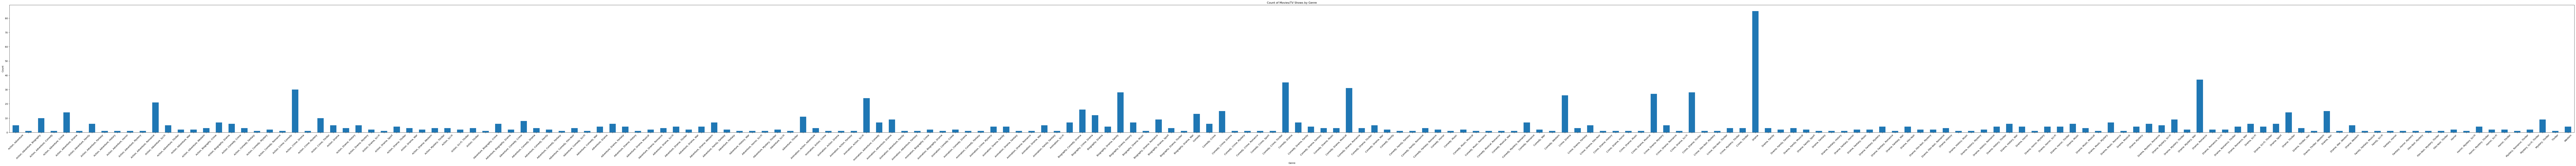

In [7]:
#Visualize the data using a bar chart to show the most popular genre of movies/TV shows using pandas and the matplotlib library.

plt.figure(figsize=(200, 10))  # change the figure size if needed
countFilmGenre1 = allFilm.groupby('Genre').size()
countFilmGenre1.plot(kind='bar')
plt.title('Count of Movies/TV Shows by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [8]:
#Identify the director with the most top-rated movies/TV shows

director_count = allFilm['Director'].value_counts().reset_index()
director_count.columns = ['Director', 'Count']
sorted_directors = director_count.sort_values(by='Count', ascending=False)
most_common_director = sorted_directors.iloc[0]['Director']
print('the most director: ',most_common_director)
print('All Director with count of movies/TV\n',sorted_directors)


the most director:  Alfred Hitchcock
All Director with count of movies/TV
              Director  Count
0    Alfred Hitchcock     14
1    Steven Spielberg     13
2      Hayao Miyazaki     11
3     Martin Scorsese     10
4      Akira Kurosawa     10
..                ...    ...
311     Jonathan Lynn      1
310         Marc Caro      1
309      David Zucker      1
308       Mark Rydell      1
547    George Stevens      1

[548 rows x 2 columns]


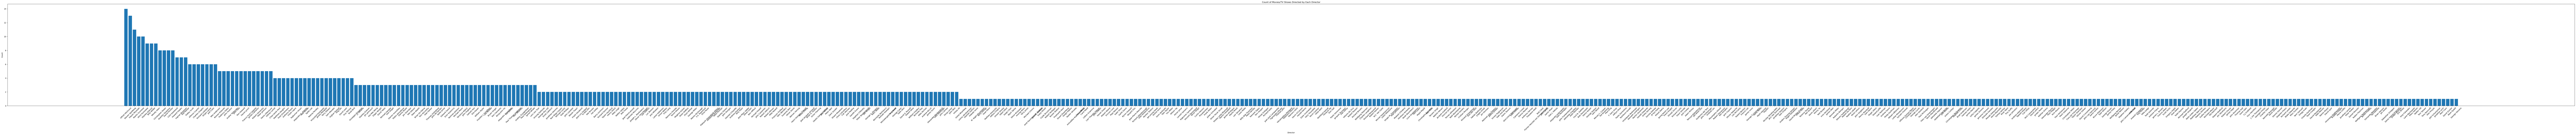

In [11]:
#Visualize the data using a bar chart to show the director with the most top-rated movies/TV 

plt.figure(figsize=(250, 10))  # Adjust the figure size if needed
plt.bar(sorted_directors['Director'], sorted_directors['Count'])
plt.title('Count of Movies/TV Shows Directed by Each Director')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()